In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 'mymoviedb.csv' is the file containing Netflix movie data
# 'lineterminator="\n"' is used to define the end of each line (helpful if line breaks are not handled properly)

df = pd.read_csv("mymoviedb.csv", lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# Displays dataset structure: columns, non-null counts, and data types
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


**No missing values (NaNs) found in the dataset**

**Dropping columns: Overview, Original_Language, Poster_Url — not useful for analysis**

**Converting 'Release_Date' to datetime format**

**Extracting only the release year into 'Release_Year' column**


In [4]:
# exploring genres column 
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

**Genres are separated by commas followed by whitespaces**


In [5]:
# Check for duplicated rows
df.duplicated().sum()

np.int64(0)

**Our dataset has no duplicated rows either.**

In [6]:
# Exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**• Exploration Summary**

**• We have a DataFrame consisting of 9827 rows and 9 columns.**  
**• The dataset looks no NaNs or duplicated values.**  
**• 'Release_Date' column needs to be casted into datetime format, and only the year should be extracted.**  
**• 'Overview', 'Original_Language', and 'Poster-Url' columns wouldn't be useful during analysis.**  
**• There are noticeable outliers in the 'Popularity' column.**  
**• 'Vote_Average' would be better categorized for proper analysis.**  
**• 'Genre' column has comma-separated values and whitespaces that need to be handled.**


## Data Cleaning ##

**Casting 'Release_Date' column to datetime format and extracting year values**


In [7]:
# Convert 'Release_Date' to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [8]:
# Extract only the year from 'Release_Date'
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Drop 'Overview', 'Original_Language', and 'Poster_Url' columns**

In [11]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [12]:
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**• Categorizing the 'Vote_Average' column based on quartiles**

**• We will divide 'Vote_Average' into 4 categories: 'not_popular', 'below_avg', 'average', and 'popular'**

**• This will be done using the custom `catigorize_col()` function which uses the column's quartile values**

**• The result will be a new column named 'Vote_Average_Category'**


In [13]:
def categorize_col(df, col, labels):
    """
    Categorizes a certain column based on its quartiles.
    
    Args:
        df (DataFrame): The dataframe we are processing
        col (str): The name of the column to categorize
        labels (list): List of category labels from min to max

    Returns:
        DataFrame: DataFrame with the categorized column
    """
    # Setting the edges (bins) using the column's quartiles
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    # Categorizing the column based on the quartile edges
    df[col + '_Category'] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    
    return df


In [14]:
# Labels to categorize values into three levels of popularity: low, medium, and high
labels = ['not_popular', 'below_average', 'average', 'popular']


In [15]:
# Categorize the 'Vote_Average' column into 3 levels using the defined labels
categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average
...,...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,7.6,"Drama, Crime",popular
9823,2020,Violent Delights,13.356,8,3.5,Horror,not_popular
9824,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",not_popular
9825,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",average


In [16]:
# Confirming the unique categories assigned to 'Vote_Average_Category'
df['Vote_Average_Category'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [17]:
# Count how many rows fall into each category
df['Vote_Average_Category'].value_counts()

Vote_Average_Category
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [18]:
# dropping NaNs
df.dropna(inplace=True)

In [19]:
# Check the number of missing (NaN) values in each column
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_Category    0
dtype: int64

 **We'll split the 'Genre' column into a list and then explode the DataFrame so that each movie has only one genre per row**


In [20]:
# Split the 'Genre' column into a list of genres
df['Genre'] = df['Genre'].str.split(', ')

# Explode the DataFrame so each movie-genre pair becomes its own row
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [21]:
# Convert 'Genre' column to category type for better performance and memory efficiency
df['Genre'] = df['Genre'].astype('category')

# Display the data type of the 'Genre' column
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25552 non-null  int32   
 1   Title                  25552 non-null  object  
 2   Popularity             25552 non-null  float64 
 3   Vote_Count             25552 non-null  int64   
 4   Vote_Average           25552 non-null  float64 
 5   Genre                  25552 non-null  category
 6   Vote_Average_Category  25552 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [23]:
df.nunique()

Release_Date              100
Title                    9415
Popularity               8088
Vote_Count               3265
Vote_Average               73
Genre                      19
Vote_Average_Category       4
dtype: int64

**Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25,551 rows to dig into during our analysis**


# **Data Visualization**

**Here we'd use Matplotlib and Seaborn to create informative visuals to gain insights about our data**


In [24]:
# Set Seaborn plot style to 'whitegrid' for better visual clarity
sns.set_style('whitegrid')

# **Q1: What is the most frequent genre in the dataset?**


In [25]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

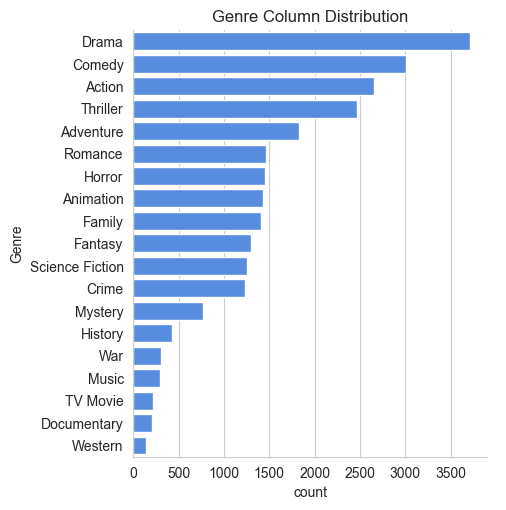

In [26]:
# Visualizing the distribution of genres in the dataset
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='#4287f5')

plt.title('Genre Column Distribution')
plt.show()

**We can notice from the above visual that the Drama genre is the most frequent in our dataset, appearing more than 14% of the time among 19 other genres**


# **Q2: Which genre has the highest average vote?**

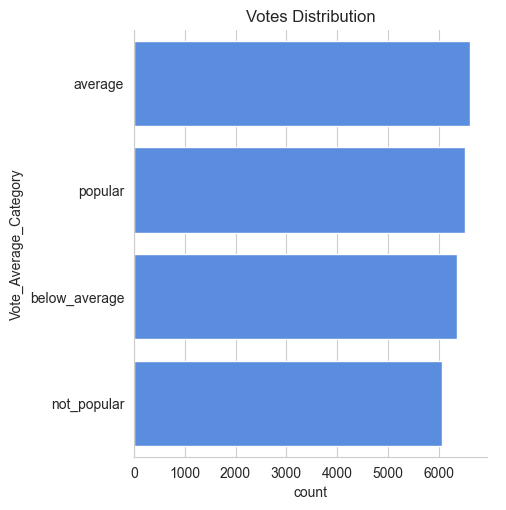

In [27]:
# Visualizing the distribution of vote average categories
sns.catplot(y='Vote_Average_Category', data=df, kind='count',
            order=df['Vote_Average_Category'].value_counts().index, 
            color='#4587f5')

plt.title('Votes Distribution')
plt.show()


# **Q3: What movie got the highest popularity? What’s its genre?**


In [28]:
# Check which movie has the highest popularity in the dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


# **Q4: What movie got the lowest popularity? What’s its genre?**


In [29]:
# Check which movie has the lowest popularity in the dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
25546,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25547,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25548,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25549,1984,Threads,13.354,186,7.8,War,popular
25550,1984,Threads,13.354,186,7.8,Drama,popular
25551,1984,Threads,13.354,186,7.8,Science Fiction,popular


# **Q5: Which year has the most films released?**


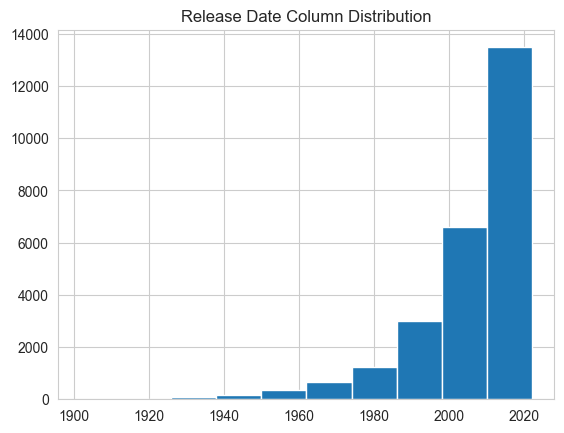

In [30]:
# Visualizing the distribution of movie release dates
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()


# **============================**
# **Final Analysis Summary**
# **============================**

# **Q1: What is the most frequent genre in the dataset?**
**Drama is the most frequent genre, appearing in more than 14% of movies among 19 total genres.**

# **Q2: What genre has the highest votes?**
**About 25.5% of the movies fall into the "popular" vote category (6,520 movies).** 
**Drama once again stands out with over 18.5% of those popular movies.**

# **Q3: What movie got the highest popularity? What’s its genre?**
**"Spider-Man: No Way Home" has the highest popularity in the dataset.**
**Its genres include Action, Adventure, and Science Fiction.**

# **Q4: What movie got the lowest popularity? What’s its genre?**
**"The United States Thread" has the lowest popularity.**
**Its genres include Music, Drama, War, Sci-Fi, and History.**

# **Q5: Which year has the most filmed movies?**
**The year 2020 had the highest number of movie releases in the dataset.**
